In [38]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pmdarima as pm

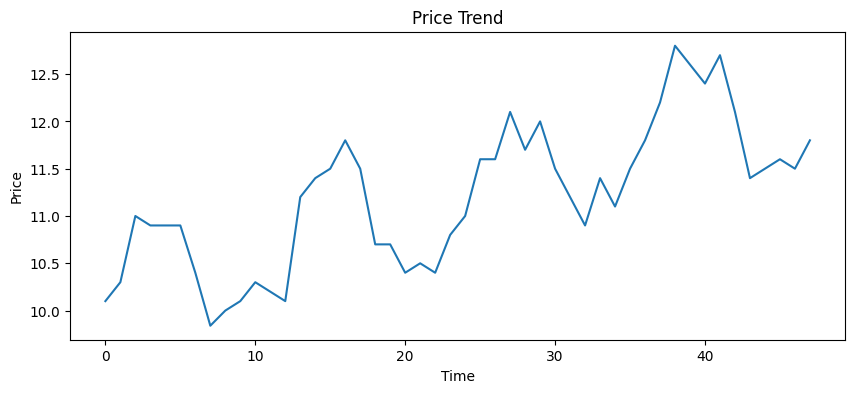

          Prices
count  48.000000
mean   11.207083
std     0.757897
min     9.840000
25%    10.650000
50%    11.300000
75%    11.625000
max    12.800000


In [39]:
# Import the csv file located in the same directory
DATA = pd.read_csv("Nat_gas.csv")

# Plotting the "Prices" on the first subplot
plt.figure(figsize=(10, 4))  # Set the size of the plot
plt.plot(DATA["Prices"])  # Plotting the data
plt.title('Price Trend')  # Title of the plot
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
tick_spacing = 10  # Change this value to adjust the sparsity of ticks
plt.xticks(range(0, len(DATA["Prices"]), tick_spacing))  # Set ticks at every 10th point
plt.show()

# general description
description = DATA.describe()
print(description)

In [47]:
print("DataFrame Structure:")
print(DATA.head())

DataFrame Structure:
            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9


Seasonal data with trends. Use SARIMA.

In [68]:
# Fit a seasonal ARIMA model
model = pm.auto_arima(DATA.Prices, seasonal=True, m=12, trace=True,
                      error_action='ignore', suppress_warnings=True)

# Forecasting the next one year, 12 months
forecast_price = model.predict(n_periods=12)

in_sample_forecast = model.predict_in_sample()
in_sample_forecast[0] = DATA.Prices.iloc[0]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.883, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=39.810, Time=0.28 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.864, Time=0.59 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.317, Time=0.79 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=35.984, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953,

/var/folders/dw/3r081_b1335dzvqm6llcz3540000gn/T/ipykernel_1512/3673994224.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  in_sample_forecast[0] = DATA.Prices.iloc[0]


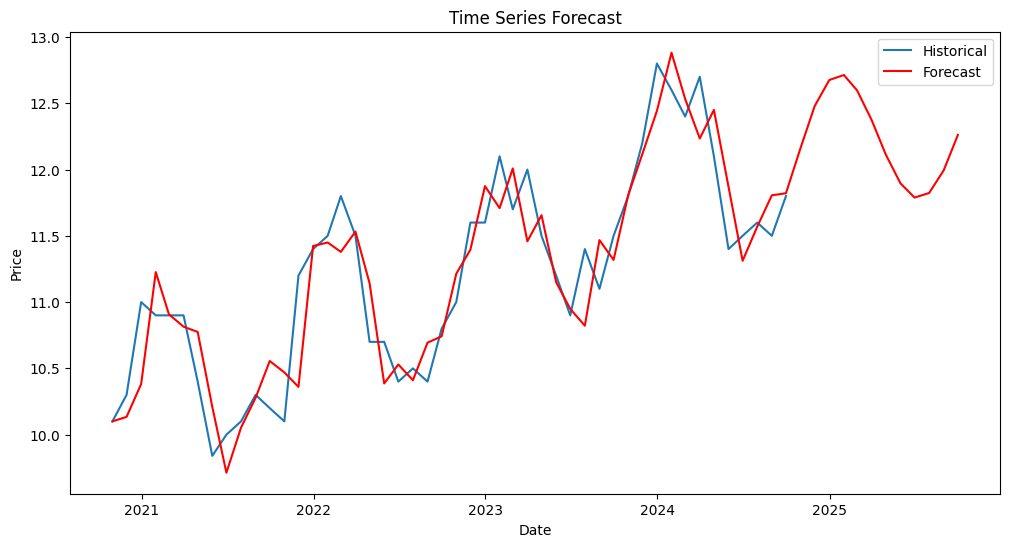

In [70]:
# Combine in-sample and out-of-sample forecasts
fulltime_forecast = pd.concat([pd.Series(in_sample_forecast, index=DATA.index),
                           pd.Series(forecast_price, index=pd.date_range(start=DATA.index[-1], periods=13, freq='M')[1:])])

# Plotting the complete forecast
plt.figure(figsize=(12, 6))
plt.plot(DATA.index, DATA.Prices, label='Historical')
plt.plot(fulltime_forecast.index, fulltime_forecast, label='Forecast', color='red')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Predict price at any given date

In [71]:
# Function to fetch the price for a given date
def get_price_for_date(query_date):
    # Convert query_date to datetime if it's a string
    if isinstance(query_date, str):
        query_date = pd.to_datetime(query_date)
    
    # Check if the date is in the index
    if query_date in fulltime_forecast.index:
        return fulltime_forecast.loc[query_date]
    else:
        return "Date is out of range. Available dates are from {} to {}.".format(DATA.index[0], full_forecast.index[-1])

# Example usage
input_date = '8/31/2023'
price = get_price_for_date(input_date)
print(f"The price on {input_date} is: {price}")

The price on 8/31/2023 is: 11.467736869650714
